In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
from sklearn import preprocessing

In [4]:
from sklearn.cluster import KMeans

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [154]:
df=pd.read_csv('deathcases.csv')

In [158]:
df.shape

(21853, 10)

In [157]:
df.Symptoms.nunique()/df.shape[0]

0.059762961607102

In [159]:
df['Symptoms'].unique().tolist()

['Fever/Cough/Breathing Difficulty',
 'Fever/Cough/Dysponea',
 'Breathing Difficulty/Tiredness',
 'Fever/Cough',
 'Fever/Cough/Breathing Difficulty/Loose stools/Decrease in oral Intake',
 'Asymptomatic',
 'Type 2 Diabetes Mellitus',
 'Diabetes Mellitus/Coronary Artery Disease',
 'Old Cerebrovascular Accident',
 'Type 2 Diabetes Mellitus/Systemic Hypertension/Chronic Kidney Disease/Hypothyroidism',
 'Systemic Hypertension/Type 2 Diabetes Mellitus',
 'Fever/Sore Throat',
 'Fever/Breathing Difficulty',
 'Cough/Breathing Difficulty',
 'Type 2 Diabetes Mellitus/Systemic Hypertension',
 'Systemic Hypertension/Type 2 Diabetes Mellitus/Chronic Kidney Disease',
 'Type 2 Diabetes Mellitus/Coronary Artery Disease/Chronic Kidney Disease/Old Anterior Wall myocardial infarction',
 'Fever ',
 'Type 2 Diabetes Mellitus/Systemic Hypertension/Bronchial Asthma',
 'Bronchial Asthma',
 'Systemic Hypertension/Diabetes Mellitus/Chronic Kidney Disease',
 'Fever/Cough/Nausea/Breathing Difficulty',
 'Fever/Brea

In [190]:
df.groupby(['Symptoms']).agg({'Daysdmitted':np.mean,'Symptoms':np.size , 'Age':np.mean}).rename(columns={'Symptoms':'SymptomsCount'}).reset_index().sort_values(by=['Age'],ascending=False).to_csv('avg_age_analysis.csv', index=False)

In [169]:
df.groupby(['Symptoms']).size().sort_values(ascending=False).to_csv('symptoms.csv')

In [114]:
def camelCase(x):
    x=x.split('/')
    s=''
    for i in x:
        i=i.split(' ')
        if len(i)>=2:
            i=[v.title() for v in i]
            s+=''.join(i)+' '
        else:
            s+=i[0].title()+' '
    return s.strip(' ')

In [115]:
df['Symptoms']=df['Symptoms'].apply(camelCase)

In [116]:
df.head(20)

,patient No,Age,Gender,District,Admit Date,DeathDate,Symptoms,Cause,File Date,Daysdmitted
0,12124,63,Male,chennai,14-12-2020,31-12-2020,Fever Cough BreathingDifficulty,COVID19 Pneumonia,01-01-2021,17
1,12125,53,Male,ramanathapuram,22-12-2020,31-12-2020,Fever Cough Dysponea,COVID19 Pneumonia,01-01-2021,9
2,12126,74,Male,salem,19-12-2020,31-12-2020,Fever Cough BreathingDifficulty,Acute Respiratory Distressyndrome/COVID19 Pneu...,01-01-2021,12
3,12127,71,Male,chennai,30-12-2020,31-12-2020,BreathingDifficulty Tiredness,Acute Respiratory Distressyndrome/COVID19 Pneu...,01-01-2021,1
4,12128,74,Male,thanjavur,24-12-2020,30-12-2020,Fever Cough,COVID19 Pneumonia,01-01-2021,6
5,12123,70,Female,chennai,21-12-2020,31-12-2020,Fever Cough BreathingDifficulty LooseStools De...,Acute Respiratory Distressyndrome/COVID19 Pneu...,01-01-2021,10
6,12129,61,Male,chennai,30-12-2020,31-12-2020,Asymptomatic,COVID Pneumonia/Respiratory Failure/Acute Resp...,01-01-2021,1
7,12130,60,Female,salem,25-12-2020,29-12-2020,Type2DiabetesMellitus,COVID Pneumonia/Respiratory Failure,01-01-2021,4
8,12131,69,Male,chengalpattu,28-12-2020,29-12-2020,DiabetesMellitus CoronaryArteryDisease,COVID Pneumonia/Acute Respiratory Distressyndrome,01-01-2021,1
9,12132,80,Male,chennai,27-12-2020,30-12-2020,OldCerebrovascularAccident,COVID Pneumonia/Acute Respiratory Distressyndrome,01-01-2021,3


In [117]:
df['District']=df['District'].apply(lambda x: x.lower().strip(' '))

In [118]:
label_encoder=preprocessing.LabelEncoder()

In [119]:
minmaxScaler=preprocessing.MinMaxScaler()

In [120]:
df['District']=label_encoder.fit_transform(df['District'])

In [121]:
df['Gender']=df['Gender'].apply(lambda x: x.strip(' ').title())

In [122]:
df['Gender']=df['Gender'].replace({'Male': 1, 'Female': 2})

In [123]:
df['District']=minmaxScaler.fit_transform(np.array(df['District']).reshape(-1, 1))

In [124]:
df['Age']=minmaxScaler.fit_transform(np.array(df['Age']).reshape(-1, 1))

In [125]:
l2=[]

In [126]:
index=[]

In [127]:
for i in range(len(df)):
    l1=df.iloc[i, 6]
    #s=','.join(l1)
    l2.append(l1)
    index.append(df.iloc[i, 0])

In [128]:
countvectorizer=CountVectorizer(analyzer='word', stop_words='english',lowercase=False)

In [129]:
countmodel=countvectorizer.fit_transform(l2)

In [130]:
count_tokens=countvectorizer.get_feature_names_out()

In [131]:
count_tokens

array(['AbdominalDiscomfort', 'AbdominalPain', 'AbductorVocalCordPalsy',
       'ActivePulmonaryTuberculosis', 'AcuteAnemia',
       'AcuteAnteriorWallMyocardinalInfarction',
       'AcuteCerebrovascularAccident', 'AcuteCoronarySyndrome',
       'AcuteKidneyDisease', 'AcuteKidneyInjury', 'AcuteMyeloidLeukemia',
       'AcuteOnChronicKidneyDisease', 'AcuteRenalFailure',
       'AcuteRespiratoryDistressSyndrome', 'AcuteRightLowerLimbIschemia',
       'AdenocarcinomaRectum', 'Aids', 'AikLeak', 'AlteredSensorium',
       'Anc', 'Anemia', 'Anorexia', 'Anosmia', 'AntenatalMother',
       'AntepartumEclampsia', 'Antivirals', 'AorticSclerosis',
       'Arthritis', 'Asthma', 'Asymptomatic', 'AtrialFibrillation',
       'Autism', 'AutoimmuneHemolyticAnemia', 'Bicytopenia',
       'BilateralLowerLimbSwelling', 'BipolarDisorder',
       'BladderOutletObstruction', 'BloodCancer', 'BodyPain',
       'BodyWeakness', 'Bph', 'BreastCancer', 'BreathingDifficulty',
       'Breathlessness', 'BronchialAsth

In [132]:
df_countvect=pd.DataFrame(data=countmodel.toarray(), index=index, columns=count_tokens)

In [133]:
df_countvect.head(20)

,AbdominalDiscomfort,AbdominalPain,AbductorVocalCordPalsy,ActivePulmonaryTuberculosis,AcuteAnemia,AcuteAnteriorWallMyocardinalInfarction,AcuteCerebrovascularAccident,AcuteCoronarySyndrome,AcuteKidneyDisease,AcuteKidneyInjury,...,UncontrolledDiabetesMellitus,UncontrolledHyperglycemia,UnstableAngina,UremicGastritis,UrinaryBladder,ValvularHeartDisease,VentricularDysfunction,VentricularSeptalDefect,Vomiting,Weakness
12124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
tfidf=TfidfVectorizer(analyzer='word', stop_words='english', lowercase=False)

In [135]:
tfidfmodel=tfidf.fit_transform(l2)

In [136]:
df_tfidf=pd.DataFrame(tfidfmodel.toarray(), index=index, columns=tfidf.get_feature_names_out())

In [137]:
tfidf.get_feature_names_out()

array(['AbdominalDiscomfort', 'AbdominalPain', 'AbductorVocalCordPalsy',
       'ActivePulmonaryTuberculosis', 'AcuteAnemia',
       'AcuteAnteriorWallMyocardinalInfarction',
       'AcuteCerebrovascularAccident', 'AcuteCoronarySyndrome',
       'AcuteKidneyDisease', 'AcuteKidneyInjury', 'AcuteMyeloidLeukemia',
       'AcuteOnChronicKidneyDisease', 'AcuteRenalFailure',
       'AcuteRespiratoryDistressSyndrome', 'AcuteRightLowerLimbIschemia',
       'AdenocarcinomaRectum', 'Aids', 'AikLeak', 'AlteredSensorium',
       'Anc', 'Anemia', 'Anorexia', 'Anosmia', 'AntenatalMother',
       'AntepartumEclampsia', 'Antivirals', 'AorticSclerosis',
       'Arthritis', 'Asthma', 'Asymptomatic', 'AtrialFibrillation',
       'Autism', 'AutoimmuneHemolyticAnemia', 'Bicytopenia',
       'BilateralLowerLimbSwelling', 'BipolarDisorder',
       'BladderOutletObstruction', 'BloodCancer', 'BodyPain',
       'BodyWeakness', 'Bph', 'BreastCancer', 'BreathingDifficulty',
       'Breathlessness', 'BronchialAsth

In [138]:
df_tfidf.head(50)

,AbdominalDiscomfort,AbdominalPain,AbductorVocalCordPalsy,ActivePulmonaryTuberculosis,AcuteAnemia,AcuteAnteriorWallMyocardinalInfarction,AcuteCerebrovascularAccident,AcuteCoronarySyndrome,AcuteKidneyDisease,AcuteKidneyInjury,...,UncontrolledDiabetesMellitus,UncontrolledHyperglycemia,UnstableAngina,UremicGastritis,UrinaryBladder,ValvularHeartDisease,VentricularDysfunction,VentricularSeptalDefect,Vomiting,Weakness
12124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df_tfidf.iloc[1, :][df_tfidf.iloc[1, :]>0]

Cough       0.226420
Dysponea    0.950297
Fever       0.213703
Name: 12125, dtype: float64

In [140]:
df_tfidf['Age']=df['Age'].to_list()

In [141]:
df_tfidf['Gender']=df['Gender'].to_list()

In [142]:
df_tfidf['District']=df['District'].to_list()

In [143]:
df_tfidf

,AbdominalDiscomfort,AbdominalPain,AbductorVocalCordPalsy,ActivePulmonaryTuberculosis,AcuteAnemia,AcuteAnteriorWallMyocardinalInfarction,AcuteCerebrovascularAccident,AcuteCoronarySyndrome,AcuteKidneyDisease,AcuteKidneyInjury,...,UremicGastritis,UrinaryBladder,ValvularHeartDisease,VentricularDysfunction,VentricularSeptalDefect,Vomiting,Weakness,Age,Gender,District
12124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.607843,1,0.052632
12125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509804,1,0.526316
12126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.715686,1,0.578947
12127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.686275,1,0.052632
12128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.715686,1,0.657895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725490,1,0.578947
36769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1,0.078947
36770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323529,1,0.078947
36771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725490,1,0.078947


In [144]:
wcss=[]

In [145]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(df_tfidf)
    wcss.append(kmeans.inertia_)

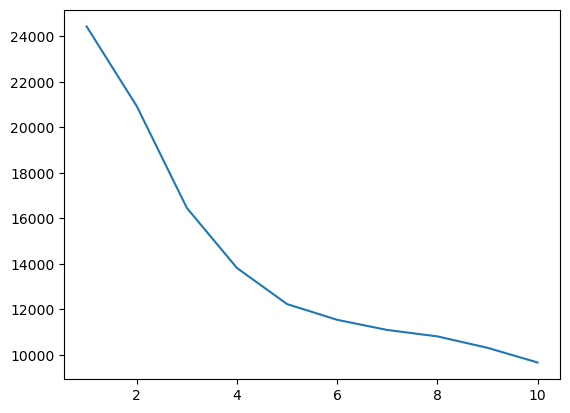

In [146]:
plt.plot(range(1, 11), wcss)

In [147]:
kmeans = KMeans(n_clusters=7, random_state=0, n_init='auto')

In [148]:
kmeans.fit(df_tfidf)

KMeans(n_clusters=7, n_init='auto', random_state=0)

In [149]:
cluster_labels=kmeans.predict(df_tfidf)

In [150]:
df_tfidf['cluster']=cluster_labels

In [151]:
df_tfidf.to_csv('tfidf1.csv')

In [152]:
df_tfidf.iloc[5955, :][df_tfidf.iloc[5955, :]>0]

Weakness    1.000000
Age         0.647059
Gender      1.000000
District    0.078947
cluster     4.000000
Name: 18290, dtype: float64

In [171]:
df=pd.read_csv('deathcases.csv')

In [172]:
df['cluster']=cluster_labels

In [ ]:
df['Frequency']=

In [173]:
df.to_csv('tfidf1.csv')